In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import array_to_latex
from qiskit_transpiler import get_pm
from qiskit_ibm_provider import IBMProvider

In [2]:
def make_circuit(noise_factor):
    q = 0
    t = 0.8765
    params = [0.0343,0.73443]
    circ = QuantumCircuit(1)
    circ.h(q)
    for _ in range(noise_factor):
        circ.rz(-params[1], q)
        circ.rx(2 * params[0] * t, q)
        circ.rz(params[1], q)
        circ.rz(-params[1], q)
        circ.rx(-2 * params[0] * t, q)
        circ.rz(params[1], q)
    circ.rz(-params[1], q)
    circ.rx(2 * params[0] * t, q)
    circ.rz(params[1], q)
    circ.h(q)
    return circ

def execute_and_get_statevector(circ):
    backend = Aer.get_backend('statevector_simulator')
    return execute(circ,backend).result().get_statevector()

In [3]:
results = []

C:\Users\Admin\.conda\envs\simuq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


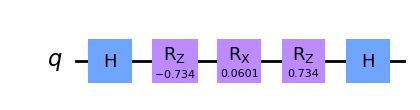

In [4]:
circ = make_circuit(0)
circ.draw('mpl')

In [5]:
array_to_latex(execute_and_get_statevector(circ))

<IPython.core.display.Latex object>

C:\Users\Admin\.conda\envs\simuq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


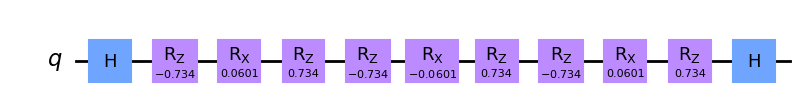

In [6]:
circ = make_circuit(1)
circ.draw('mpl')

In [7]:
array_to_latex(execute_and_get_statevector(circ))

<IPython.core.display.Latex object>

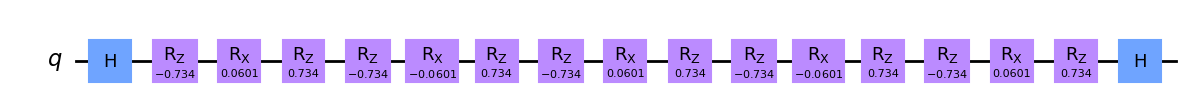

In [8]:
circ = make_circuit(2)
circ.draw('mpl')

In [9]:
array_to_latex(execute_and_get_statevector(circ))


<IPython.core.display.Latex object>

In [20]:
test = QuantumCircuit(1)

test.h(0)
test.rz(0.5,0)
test.rx(0.3,0)
test.rx(-0.3,0)
test.rz(-0.5,0)
test.h(0)

array_to_latex(execute_and_get_statevector(test))


<IPython.core.display.Latex object>

In [10]:
with open('../ibm_API_key','r') as file:
    token = file.readline()
IBMProvider.save_account(token,instance='ibm-q-ncsu/nc-state/quantum-compiler',overwrite=True)
provider = IBMProvider()

In [11]:
backend = provider.get_backend('ibmq_kolkata')
backend

<IBMBackend('ibmq_kolkata')>

In [12]:
pm = get_pm(backend)

In [13]:
circ_pm = pm.run(circ)


In [15]:
array_to_latex(execute_and_get_statevector(circ_pm))

<IPython.core.display.Latex object>